# Important
To Execute a cell. Press Shift+Enter

In [3]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Python Recap

In [2]:
# here is how you print something
a = 1
b = 2
c = a + b
print(c)

#if you want to show line number View --> Toggle Line Number

3


In [19]:
#conditional statement
x = 3
if x<5:
    print (x, 'is less than five')
else:
    print (x, 'is not less than five')

3 is less than five


In [ ]:
#define a function
def f(x):
    a = 2*x + 1
    return a
print(f(10))

In [11]:
#while loop
i = 0
while i < 10:
    i+=1
    print(i, end='') #that's how you avoid new line

12345678910

In [12]:
#here is list and use it
a1 = [1,2,3,4,5,6]
for x in a1:
    print(x, end='')
print('----')
for i,x in enumerate(a1): #if you also want the index
    print(i, x)

123456----
0 1
1 2
2 3
3 4
4 5
5 6


In [13]:
#here is how to build one (not so beautiful)
#Also notice here that I use a1 from the previous cell.
#once you execute the code it's stored in the kernel
a2 = []
for x in a1:
    a2.append(2*x)
print (a2)

[2, 4, 6, 8, 10, 12]


In [14]:
#But this is ugly
#let us use list comprehension makes it much easier to read
a3 = [2*x+1 for x in a1]
print (a3)

[3, 5, 7, 9, 11, 13]


In [15]:
#but since we will be using it a lot we have something much better
#it's called numpy array

arr = np.linspace(0,1,10) #this gives you 10 number from 0 to 10 equally spaced 
print (arr)
print (2*arr) #array broadcasting magic it does what you think it should
print (arr**2)
print (np.exp(arr)) #exp function

#you can also convert normal list to numpy array if you want
arr3 = np.array(a3)
print(arr3*2)

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]
[ 0.          0.22222222  0.44444444  0.66666667  0.88888889  1.11111111
  1.33333333  1.55555556  1.77777778  2.        ]
[ 0.          0.01234568  0.04938272  0.11111111  0.19753086  0.30864198
  0.44444444  0.60493827  0.79012346  1.        ]
[ 1.          1.11751907  1.24884887  1.39561243  1.5596235   1.742909
  1.94773404  2.17662993  2.43242545  2.71828183]
[ 6 10 14 18 22 26]


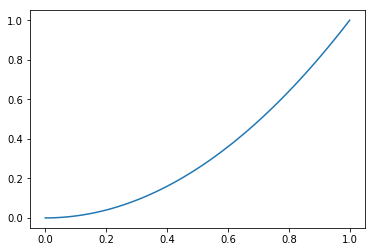

In [16]:
#plotting is easy
xs = np.linspace(0,1,100)
ys = xs**2
plt.plot(xs,ys)
plt.savefig('first_plot.pdf') #you can save it too

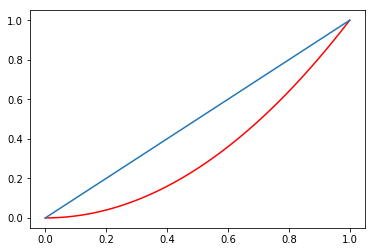

In [17]:
plt.plot(xs,ys, color='red') #change the style too
plt.plot(xs,xs) #and you can plot two things on the same graph
#It can do much more see: http://matplotlib.org/gallery.html

(-1, 10)

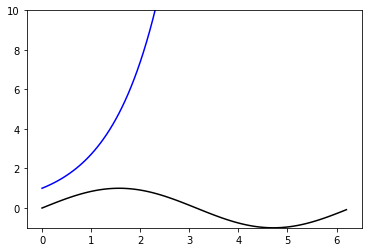

In [9]:
xs= np.linspace(0,6.2,100)
ys = np.sin(xs)
y2 = np.exp(xs)
plt.plot(xs,ys, color='black')
plt.plot(xs,y2, color='blue')

plt.ylim(-1,10)

## Root Finding

#### 1) Consider $x = cos(x)$. Our goal is to solve for x that satisfy that.

Plot something that helps you solve it.

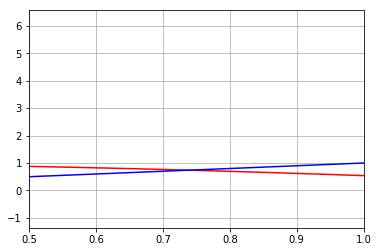

In [13]:
xs=np.linspace(0,6.2,100)
ys=np.cos(xs)
plt.plot(xs,ys,color="red")
plt.plot(xs,xs,color="blue")
plt.xlim(0.5,1.0)
plt.grid()


#### 2) Given the what you did what is your answer?

In [ ]:
0.75-0.

#### 3) How accurate is your answer?
$answer = \ldots \pm \ldots$

Accuracy is also an important part for numerical algorithm --> How fast we can improve our accuracy.

In [ ]:
0.75 +- 0.05

#### 4) Make it more accurate

#### 5) Write the equation above as $f(x)= 0$

# Bisection

#### 1) If you use a bisection method and your starting bound is $x=0.2$ and $x=1.2$, how do you know that there is a solution by looking only at $f(0.2)$ and $f(1.2)$

#### 2) Plot the graph along with the two vertical line representing the bound. (use plt.axvline)

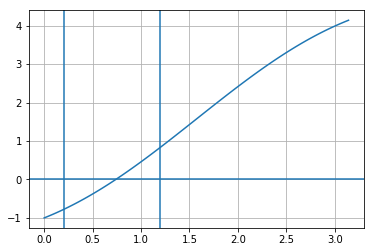

In [26]:
xs = np.linspace(0,math.pi,100)
ys = xs-np.cos(xs)
plt.plot(xs,ys)
plt.axvline(0.2)
plt.axvline(1.2)
plt.axhline(0)
plt.grid()

#### 3) If we guess right in the middle of the two bound what would be the error on our guess?
$$
    answer = \ldots \pm \ldots
$$


In [ ]:
0.7 +- 0.5

#### 4) If you want to make a new pair of bound which pair would you pick? How did you know?

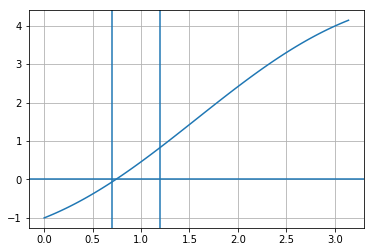

In [32]:
checkPoint = 0.7 - math.cos(0.7)
xs = np.linspace(0,math.pi,100)
ys = xs-np.cos(xs)
plt.plot(xs,ys)
plt.axvline(0.7)
plt.axvline(1.2)
plt.axhline(0)
plt.grid()

#### 5) Write a function which find solution to f(x)=0 using the method you just discovered. Try plotting as you go.

In [4]:
def bisection(f: 'Function' , lb: float, ub: float, n: int) -> float:
    for i in range(n):
        guess = (lb + ub )/2
        y_left = f(lb)
        y_right = f(ub)
        y_guess = f(guess)
        if y_left*y_guess < 0:
            ub = guess
        else:
            lb = guess
    return guess
    
def magic_function(x):
    return np.cos(x)-x

bisection(f=magic_function,lb=0.2,ub=1.2,n=100)
    

0.7390851332151616

#### 6) Given that the intial bound is of size $S$. After $n$ iterations how accurate is your answer?

$$\text{error}(n) = \ldots$$

#### 7) Give me the solution to  $x=cos(x)$ that is at most  $10^{−6}$ away from the real answer. Verify your solution graphically.

# Newton's Method
Let us do someting a bit more efficient. Suppose that we want to solve  $x^3−x=1$  using Newtons's method with initial guess at  $x=2$ . If you start to get lost, PLOT!.

#### 1) What is the function that we are trying to find intercept? Plot it.

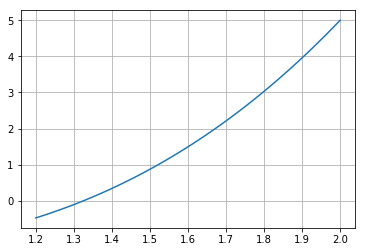

In [57]:
xs= np.linspace(1.2,2)
ys= xs**3-xs-1 
plt.plot(xs,ys)
plt.grid()


#### 2) What is the slope of the tangent line at $x=2$

In [56]:
def slopefunc(x):
    return 3*(x**2)-1

slopefunc(2)

#### 3) What is the equation for the tangent line at  $x=2$ Plot it along with the function.

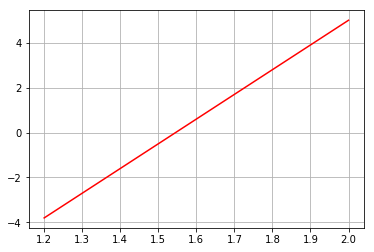

In [60]:
xs= np.linspace(1.2,2)
y2= 11*xs - 17 
plt.plot(xs,y2, color="red")
plt.grid()

#### 4) What is the intercept for that line? That's your new guess.

In [63]:
x_in= -(-17)/11
print(x_in)

1.5454545454545454


#### 5) Now combine everything in to one formula you should get something along the line of

$$
x_{n+1} = \ldots - \frac{\ldots(x_n)}{\ldots(x_n)}
$$

This is called update rule; how you get an improved answer from the previous guess.

#### 6) Newton's method converges very very quickly. We will go through the derivation later on.
Now find solution to $x^3−x=1$. Also as a plotting exercise try make something similar to this figure:

Here is how I annotate the figure
`plt.annotate('x%d'%i, xy=(x, 0), xytext=(x,-0.2), fontsize=18)`

<img src="trythis.png" width="500px"/>

In [ ]:
def newton_method(f:'Function',f_pr:'F prime',x_guess: float, )

#### 7) Solve $\sqrt[3]{x}=0$ by hand. What's $x$?

In [ ]:
0

#### 8) Try Newton's method on it.
Try plotting as you go to see what's going on.

Now you learn that even though it converges super fast. It doesn't guarantee to converge.

# Bonus


#### 1) Simplify (1+x)-1

#### 2) Then why is this false

In [3]:
x = 1e-10
print (x)
print ((1+x)-1 == x)

1e-10
False
